In [1]:
# import pandas for structuring the data
import pandas as pd
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
# import numpy for numerical analysis
import numpy as np

#from sklearn import preprocessing

## Load data

In [2]:
def utc_to_date(timestamp):
    return pd.to_datetime(timestamp, unit = 's').date()

In [45]:
# Loading subreddits data set
wallstreetbets_df = pd.read_csv('DATA/wallstreetbets_sample_data.csv')
stocks_df = pd.read_csv('DATA/stocks_sample_data.csv')
stocks_df = pd.read_csv('DATA/stocks_sample_data.csv')

In [6]:
# wallstreetbets: gamestop mentions
org_gme_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'GME' in orgs)]
org_gamestop_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'GameStop' in orgs)]
wallstreetbets_df = pd.concat([org_gme_df, org_gamestop_df], ignore_index=True)
wallstreetbets_df.rename(columns = {'created_utc':'Date'}, inplace = True)
wallstreetbets_df['Date'] = wallstreetbets_df['Date'].apply(utc_to_date)
wallstreetbets_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,283,283,2021-05-14,NaN,wallstreetbets,What. The. Fuck. Did you just say?,NaN,NaN,gy3wrmf,t1_gy3tyev,['GME']
1,367,367,2021-05-14,NaN,wallstreetbets,What should i do. \nbought it @ 11.48,NaN,NaN,gy3sfui,t3_nc9vx9,['GME']
2,607,607,2021-05-14,NaN,wallstreetbets,LOL\n\nFee\tAvailable\tUpdated\n\n95.9 %\t100\...,NaN,NaN,gy464pa,t1_gy3wlyh,"['GME', 'AMC']"
3,730,730,2021-05-14,NaN,wallstreetbets,Last time I saw a Cramer clip- he seemed to be...,NaN,NaN,gy49h2h,t3_nc8sj2,['GME']
4,926,926,2021-05-14,NaN,wallstreetbets,GME is gona make a bunch of millionaires.....a...,NaN,NaN,gy3frfw,t3_nc6qi3,['GME']


In [49]:
# stocks: gamestop mentions
org_gme_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'GME' in orgs)]
org_gamestop_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'GameStop' in orgs)]
stocks_df = pd.concat([org_gme_df, org_gamestop_df], ignore_index=True)
stocks_df.rename(columns = {'created_utc':'Date'}, inplace = True)
stocks_df['Date'] = stocks_df['Date'].apply(utc_to_date)
stocks_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,283,283,2021-05-15,NaN,stocks,2spooky4me,NaN,NaN,gy61j92,t1_gy60qak,['GME']
1,367,367,2021-05-15,NaN,stocks,Love it. ❤️❤️❤️,NaN,NaN,gy68b6w,t1_gy63exy,['GME']
2,607,607,2021-05-15,NaN,stocks,> they have (to my knowledge) very limited ent...,NaN,NaN,gy6gmbn,t1_gy6ap2d,"['GME', 'AMC']"
3,730,730,2021-05-14,NaN,stocks,I guess a better way to put it would be “time ...,NaN,NaN,gy5e8cb,t1_gy56c06,['GME']
4,926,926,2021-05-15,NaN,stocks,In BC the house I was looking to buy in early ...,NaN,NaN,gy63xbh,t1_gy5ronu,['GME']


In [7]:
# Loading gme stock prices
gme_prices_df = pd.read_csv('DATA/GME.csv')
print(gme_prices_df.isnull().sum())

Unnamed: 0    0
Adj Close     3
dtype: int64


In [19]:
# Delete rows with NaN values
gme_prices_df = gme_prices_df.dropna()
gme_prices_df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
gme_prices_df['Date'] = pd.to_datetime(gme_prices_df['Date'])
gme_prices_df.head(3)

,Date,Adj Close
3,2021-01-04,17.250000
4,2021-01-05,17.370001
5,2021-01-06,18.360001


## Combining mentions and prices

### r/wallstreetbets

In [28]:
wsb_mentions = wallstreetbets_df[['Date', 'Organizations']]
wsb_mentions

,Date,Organizations
0,2021-05-14,['GME']
1,2021-05-14,['GME']
2,2021-05-14,"['GME', 'AMC']"
3,2021-05-14,['GME']
4,2021-05-14,['GME']
...,...,...
4973,2021-05-11,"['GameStop', 'DUH']"
4974,2021-05-07,['GameStop']
4975,2021-05-08,['GameStop']
4976,2021-05-07,['GameStop']


In [29]:
# Counting mentions per date
wsb_mentions = wsb_mentions['Date'].value_counts().to_frame().reset_index()
wsb_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
wsb_mentions.rename(columns = {'index':'Date'}, inplace = True)
wsb_mentions['Date'] = pd.to_datetime(wsb_mentions['Date'])
wsb_mentions

,Date,Mentions
0,2021-05-13,771
1,2021-05-10,653
2,2021-05-11,613
3,2021-05-12,599
4,2021-05-09,582
5,2021-05-07,572
6,2021-05-08,569
7,2021-05-14,484
8,2021-05-15,104
9,2021-05-06,31


In [30]:
# Adding prices
wsb_mentions = pd.merge(wsb_mentions, gme_prices_df, how='outer', on='Date')
wsb_mentions = wsb_mentions.sort_values(by='Date',ascending=True)
wsb_mentions = wsb_mentions.reset_index(drop=True)
wsb_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
wsb_mentions = wsb_mentions.dropna()
#TSLA.rename(columns = {'Mentions':'Robinhood'}, inplace = True)
wsb_mentions = wsb_mentions.drop(122)
wsb_mentions

,Date,Mentions,Price
123,2021-05-07,572.0,161.110001
124,2021-05-08,569.0,161.110001
125,2021-05-09,582.0,161.110001
126,2021-05-10,653.0,143.220001
127,2021-05-11,613.0,146.919998
128,2021-05-12,599.0,146.919998


### r/stocks

In [50]:
stocks_mentions = stocks_df[['Date', 'Organizations']]
stocks_mentions

,Date,Organizations
0,2021-05-15,['GME']
1,2021-05-15,['GME']
2,2021-05-15,"['GME', 'AMC']"
3,2021-05-14,['GME']
4,2021-05-15,['GME']
...,...,...
278,2021-05-05,['GameStop']
279,2021-05-05,['GameStop']
280,2021-05-03,"['AMD', 'GameStop', 'Tesla']"
281,2021-05-03,['GameStop']


In [51]:
# Counting mentions per date
stocks_mentions = stocks_mentions['Date'].value_counts().to_frame().reset_index()
stocks_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
stocks_mentions.rename(columns = {'index':'Date'}, inplace = True)
stocks_mentions['Date'] = pd.to_datetime(stocks_mentions['Date'])
stocks_mentions

,Date,Mentions
0,2021-05-13,34
1,2021-05-04,29
2,2021-05-11,26
3,2021-05-05,23
4,2021-05-14,23
5,2021-05-12,22
6,2021-05-07,19
7,2021-05-06,18
8,2021-04-30,17
9,2021-05-01,16


In [52]:
# Adding prices
stocks_mentions = pd.merge(stocks_mentions, gme_prices_df, how='outer', on='Date')
stocks_mentions = stocks_mentions.sort_values(by='Date',ascending=True)
stocks_mentions = stocks_mentions.reset_index(drop=True)
stocks_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
stocks_mentions = stocks_mentions.dropna()
stocks_mentions = stocks_mentions.drop(122)
stocks_mentions

,Date,Mentions,Price
115,2021-04-29,5.0,176.190002
116,2021-04-30,17.0,173.589996
117,2021-05-01,16.0,173.589996
118,2021-05-02,6.0,173.589996
119,2021-05-03,12.0,162.199997
120,2021-05-04,29.0,160.729996
121,2021-05-05,23.0,159.479996
123,2021-05-07,19.0,161.110001
124,2021-05-08,12.0,161.110001
125,2021-05-09,3.0,161.110001


## A look at the data

### r/wallstreetbets

In [31]:
# Correlation matrix
corrmat = wsb_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.893115
Price,-0.893115,1.000000


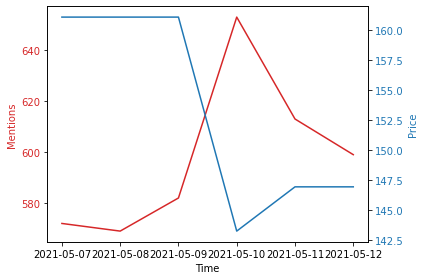

In [32]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(wsb_mentions['Date'], wsb_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(wsb_mentions['Date'], wsb_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### r/stocks

In [55]:
# Correlation matrix
corrmat = stocks_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.326685
Price,-0.326685,1.000000


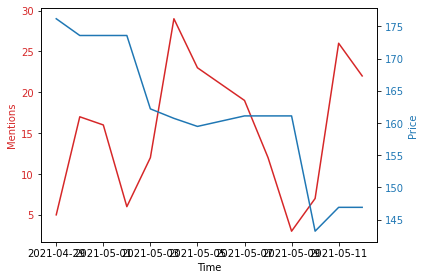

In [56]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(stocks_mentions['Date'], stocks_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(stocks_mentions['Date'], stocks_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
